In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

# 1. Univariate Regression

## 1.1 Sample Data
Simple Sample Data

In [3]:
X = np.array([1,2,3,4])
y = np.array([2,1,4,3])

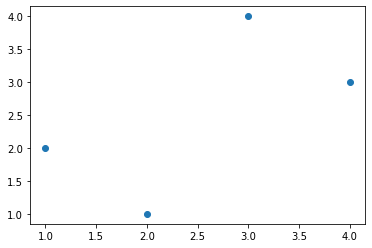

In [4]:
plt.scatter(X,y)

## 1.2 Data Reshaping
Scikit-learn needs (n, c) shape for model training
- n stands for the number of data
- c stands for the number of features

In [5]:
X.shape  # avoid rank0 shape as possible

(4,)

In [8]:
data = X.reshape(-1, 1)
data.shape

(4, 1)

## 1.3 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

### 1.3.1 Training
Linear Regression model with LinearRegression from skikit-learn package

In [11]:
model.fit(X=data, y=y)

LinearRegression()

### 1.3.2 Bias and Coefficient

In [13]:
print(model.intercept_)  # bias
print(model.coef_)  # coefficient

1.0000000000000004
[0.6]


### 1.3.3 Prediction

In [14]:
pred = model.predict(data)

In [15]:
pred

array([1.6, 2.2, 2.8, 3.4])

## 1.4 Plot and Sactter

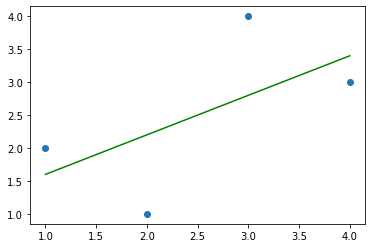

In [17]:
plt.scatter(X, y)
plt.plot(X, pred, color='green')

# 2. Multivariate Regression

## 2.1 Sample Data
Simple Sample Data for Multivariate Regression

In [18]:
bias = 1
beta = np.array([2,3,4,5]).reshape(4, 1)
noise = np.random.randn(100, 1)

In [19]:
X = np.random.randn(100, 4)
y = bias + X.dot(beta)
y_with_noise = y + noise

In [20]:
X[:10]

array([[-0.28689651, -1.64117434, -2.01449175, -0.38067858],
       [ 0.84070035, -1.0659891 ,  0.39253668, -0.01708306],
       [ 0.57996853,  0.17081044,  0.25746521, -0.1747546 ],
       [-0.26220762, -1.492324  , -0.51367482,  0.30232325],
       [-1.68503559,  1.81021357, -0.23144082, -0.48362959],
       [-1.21067889, -1.73535342, -0.92426992,  0.95416358],
       [ 1.12984836, -0.59711258, -0.67519295,  2.32168905],
       [ 1.58295323, -1.54052915,  1.44616767,  0.18427423],
       [ 0.21413282, -0.87147387, -1.25398238,  1.14069901],
       [ 0.20168216,  1.97784089,  0.00610091,  0.63417783]])

In [21]:
y_with_noise[:10]

array([[-1.44592039e+01],
       [ 6.93263401e-01],
       [ 2.68917066e+00],
       [-2.55978407e+00],
       [-1.23237547e-03],
       [-4.79287120e+00],
       [ 1.06770141e+01],
       [ 6.79065811e+00],
       [-1.25093146e-01],
       [ 1.09099931e+01]])

## 2.2 Multivariate Regression

In [22]:
model = LinearRegression()
model.fit(X, y_with_noise)

LinearRegression()

## 2.3 Bias and Coefficient

In [23]:
print(model.intercept_)
print(model.coef_)

[0.99216452]
[[2.0089763  2.99144342 3.987608   4.97903917]]


## 2.4 Statistic Method

In [25]:
bias_X = np.array([1]*len(X)).reshape(-1, 1)
stat_X = np.hstack([bias_X, X])
X_X_transpose = stat_X.transpose().dot(stat_X)
X_X_transpose_inverse = np.linalg.inv(X_X_transpose)

In [26]:
stat_beta = X_X_transpose_inverse.dot(stat_X.transpose()).dot(y_with_noise)

In [27]:
stat_beta

array([[0.99216452],
       [2.0089763 ],
       [2.99144342],
       [3.987608  ],
       [4.97903917]])

# 3. Polynomial Regression

## 3.1 Sample Data

In [32]:
bias = 1
beta = np.array([2,3]).reshape(2,1)
noise = np.random.randn(100, 1)

In [33]:
X = np.random.randn(100, 1)
X_poly = np.hstack([X, X**2])

In [34]:
y = bias + X_poly.dot(beta)
y_with_noise = y + noise

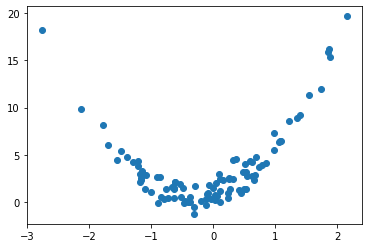

In [35]:
plt.scatter(X, y_with_noise)

## 3.2 Polynomial Regression

### 3.2.1 Training

In [36]:
model = LinearRegression()
model.fit(X_poly, y_with_noise)

LinearRegression()

### 3.2.2 Bias and Coefficient

In [37]:
print(model.intercept_)
print(model.coef_)

[0.99887624]
[[1.98170348 3.03499403]]


## 3.3 Prediction

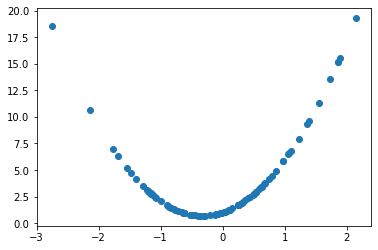

In [38]:
pred = model.predict(X_poly)
plt.scatter(X, pred)